### Un poco de lectura

https://serokell.io/blog/feature-engineering-for-machine-learning

### Las librerías de siempre

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

#from sklearn.model_selection import train_test_split

#from IPython.display import Image  

### Nuestros datos

In [2]:
directorio_data = '../data/'

x_training_file = directorio_data + 'x_traininig.csv'
#y_training_file = directorio_data + 'y_traininig.csv'

#x_testing_file = directorio_data + 'x_testing.csv'
#y_testing_file = directorio_data + 'y_testing.csv'

In [3]:
df = pd.read_csv(x_training_file)
#df_y_training_validacion = pd.read_csv(y_training_file)

#X_testing = pd.read_csv(x_testing_file)
#Y_testing = pd.read_csv(y_testing_file)

In [4]:
df.head()

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,7377,3.250000,3.000,3.000000,3.250000,3.250000,5.2
1,21753,4.150000,4.175,4.400000,4.125000,4.125000,4.2
2,5330,4.000000,4.000,4.000000,4.000000,4.500000,8.0
3,67188,4.125000,3.875,3.750000,4.125000,4.000000,6.0
4,16542,4.208333,3.750,4.333333,4.083333,4.083333,6.7


### Manejo de outliers

### Manejo de datos faltantes

### Discretización (o categorización)

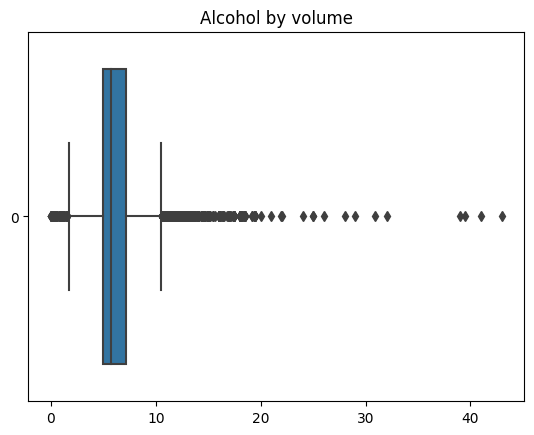

In [5]:
data = df['beer_abv']
titulo = 'Alcohol by volume'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

https://www.birra365.com/13-cervezas-por-graduacion

* CERVEZAS MUY SUAVES de 0% a 3% (ABV)
* CERVEZAS SUAVES de 3% a 6% (ABV)
* CERVEZAS COMPLEJAS de 6% a 9% (ABV)
* CERVEZAS POTENTES de 9% a 12% (ABV)
* CERVEZAS ALTA GRADUACION + 12% (ABV)

In [6]:
conditions = [
    (df['beer_abv'] < 3),
    (df['beer_abv'] >= 3) & (df['beer_abv'] < 6),
    (df['beer_abv'] >= 6) & (df['beer_abv'] < 9),
    (df['beer_abv'] >= 9) & (df['beer_abv'] < 12),
    (df['beer_abv'] >= 12)
]

values = ['MUY SUAVE', 'SUAVE', 'COMPLEJA', 'POTENTE', 'ALTA GRADUACION']

df['potencia_alcoholica'] = np.select(conditions, values)

df

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,potencia_alcoholica
0,7377,3.250000,3.000000,3.000000,3.250000,3.250000,5.2,SUAVE
1,21753,4.150000,4.175000,4.400000,4.125000,4.125000,4.2,SUAVE
2,5330,4.000000,4.000000,4.000000,4.000000,4.500000,8.0,COMPLEJA
3,67188,4.125000,3.875000,3.750000,4.125000,4.000000,6.0,COMPLEJA
4,16542,4.208333,3.750000,4.333333,4.083333,4.083333,6.7,COMPLEJA
...,...,...,...,...,...,...,...,...
39195,44681,3.750000,3.250000,3.750000,4.000000,3.500000,5.1,SUAVE
39196,41195,3.571823,3.350829,3.486188,3.389503,3.370166,5.0,SUAVE
39197,16000,3.625000,3.687500,3.812500,3.812500,3.875000,5.0,SUAVE
39198,11281,3.907407,3.444444,3.462963,3.555556,3.777778,4.0,SUAVE


### Codificación categórica (one hot encoding)

In [15]:
df['potencia_alcoholica_muy_suave'] = 0
df['potencia_alcoholica_suave'] = 0
df['potencia_alcoholica_compleja'] = 0
df['potencia_alcoholica_potente'] = 0
df['potencia_alcoholica_alta_graduacion'] = 0

df.loc[df['potencia_alcoholica'] == 'MUY SUAVE', 'potencia_alcoholica_muy_suave'] = 1
df.loc[df['potencia_alcoholica'] == 'SUAVE', 'potencia_alcoholica_suave'] = 1
df.loc[df['potencia_alcoholica'] == 'COMPLEJA', 'potencia_alcoholica_compleja'] = 1
df.loc[df['potencia_alcoholica'] == 'POTENTE', 'potencia_alcoholica_potente'] = 1
df.loc[df['potencia_alcoholica'] == 'ALTA GRADUACION', 'potencia_alcoholica_alta_graduacion'] = 1

df

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,potencia_alcoholica,potencia_alcoholica_muy_suave,potencia_alcoholica_suave,potencia_alcoholica_compleja,potencia_alcoholica_potente,potencia_alcoholica_alta_graduacion
0,7377,3.250000,3.000000,3.000000,3.250000,3.250000,5.2,SUAVE,0,1,0,0,0
1,21753,4.150000,4.175000,4.400000,4.125000,4.125000,4.2,SUAVE,0,1,0,0,0
2,5330,4.000000,4.000000,4.000000,4.000000,4.500000,8.0,COMPLEJA,0,0,1,0,0
3,67188,4.125000,3.875000,3.750000,4.125000,4.000000,6.0,COMPLEJA,0,0,1,0,0
4,16542,4.208333,3.750000,4.333333,4.083333,4.083333,6.7,COMPLEJA,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39195,44681,3.750000,3.250000,3.750000,4.000000,3.500000,5.1,SUAVE,0,1,0,0,0
39196,41195,3.571823,3.350829,3.486188,3.389503,3.370166,5.0,SUAVE,0,1,0,0,0
39197,16000,3.625000,3.687500,3.812500,3.812500,3.875000,5.0,SUAVE,0,1,0,0,0
39198,11281,3.907407,3.444444,3.462963,3.555556,3.777778,4.0,SUAVE,0,1,0,0,0


### Estandarización

In [8]:
review_overall_mean = df['review_overall'].mean()
review_overall_std = df['review_overall'].std()
df['review_overall_estandarizado'] = (df['review_overall'] - review_overall_mean) /review_overall_std
df

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,potencia_alcoholica,beer_abv_estandarizado,review_overall_estandarizado
0,7377,3.250000,3.000000,3.000000,3.250000,3.250000,5.2,SUAVE,-0.525138,-0.661963
1,21753,4.150000,4.175000,4.400000,4.125000,4.125000,4.2,SUAVE,-1.014133,0.802378
2,5330,4.000000,4.000000,4.000000,4.000000,4.500000,8.0,COMPLEJA,0.844047,0.558321
3,67188,4.125000,3.875000,3.750000,4.125000,4.000000,6.0,COMPLEJA,-0.133943,0.761702
4,16542,4.208333,3.750000,4.333333,4.083333,4.083333,6.7,COMPLEJA,0.208354,0.897289
...,...,...,...,...,...,...,...,...,...,...
39195,44681,3.750000,3.250000,3.750000,4.000000,3.500000,5.1,SUAVE,-0.574038,0.151560
39196,41195,3.571823,3.350829,3.486188,3.389503,3.370166,5.0,SUAVE,-0.622937,-0.138342
39197,16000,3.625000,3.687500,3.812500,3.812500,3.875000,5.0,SUAVE,-0.622937,-0.051821
39198,11281,3.907407,3.444444,3.462963,3.555556,3.777778,4.0,SUAVE,-1.111932,0.407669


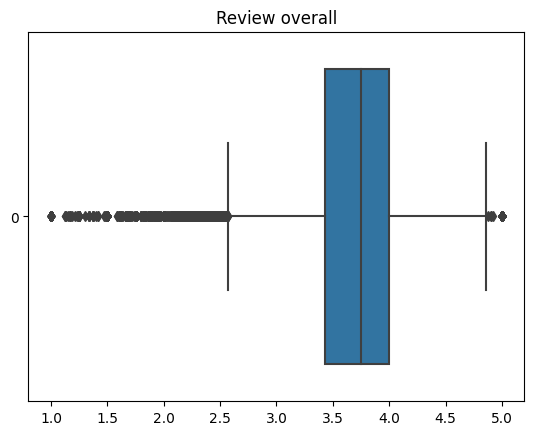

In [9]:
data = df['review_overall']
titulo = 'Review overall'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

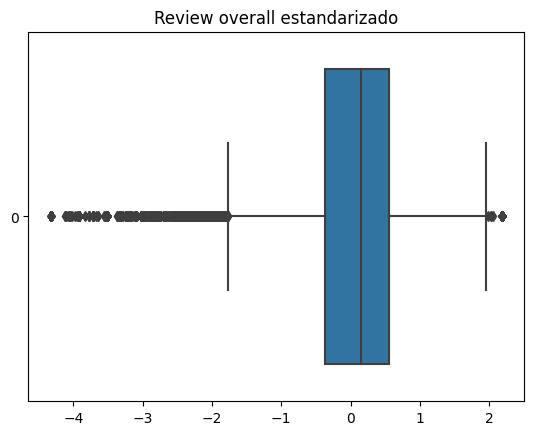

In [10]:
data = df['review_overall_estandarizado']
titulo = 'Review overall estandarizado'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

### Escalamiento

In [16]:
promedio_mundial_acohol_cerveza = 5

df['veces_promedio_mundial_alcohol'] = df['beer_abv']/promedio_mundial_acohol_cerveza
df

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,potencia_alcoholica,potencia_alcoholica_muy_suave,potencia_alcoholica_suave,potencia_alcoholica_compleja,potencia_alcoholica_potente,potencia_alcoholica_alta_graduacion,veces_promedio_mundial_alcohol
0,7377,3.250000,3.000000,3.000000,3.250000,3.250000,5.2,SUAVE,0,1,0,0,0,1.04
1,21753,4.150000,4.175000,4.400000,4.125000,4.125000,4.2,SUAVE,0,1,0,0,0,0.84
2,5330,4.000000,4.000000,4.000000,4.000000,4.500000,8.0,COMPLEJA,0,0,1,0,0,1.60
3,67188,4.125000,3.875000,3.750000,4.125000,4.000000,6.0,COMPLEJA,0,0,1,0,0,1.20
4,16542,4.208333,3.750000,4.333333,4.083333,4.083333,6.7,COMPLEJA,0,0,1,0,0,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39195,44681,3.750000,3.250000,3.750000,4.000000,3.500000,5.1,SUAVE,0,1,0,0,0,1.02
39196,41195,3.571823,3.350829,3.486188,3.389503,3.370166,5.0,SUAVE,0,1,0,0,0,1.00
39197,16000,3.625000,3.687500,3.812500,3.812500,3.875000,5.0,SUAVE,0,1,0,0,0,1.00
39198,11281,3.907407,3.444444,3.462963,3.555556,3.777778,4.0,SUAVE,0,1,0,0,0,0.80


In [29]:
df['natural_log_beer_abv'] = np.log(df['beer_abv'])
df['log_base_2_beer_abv'] = np.log2(df['beer_abv'])
df['log_base_10_beer_abv'] = np.log10(df['beer_abv'])
#df['log_base_10_beer_abv_estandarizado'] = np.log(df['beer_abv_estandarizado'])
df

C:\Users\arouiller\AppData\Local\miniconda3\envs\analisis_cervezas\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,potencia_alcoholica,potencia_alcoholica_muy_suave,potencia_alcoholica_suave,...,potencia_alcoholica_potente,potencia_alcoholica_alta_graduacion,veces_promedio_mundial_alcohol,log_beer_abv,natural_log_beer_abv,log_base_2_beer_abv,log_base_10_beer_abv,exp_beer_abv,beer_abv_estandarizado,log_base_10_beer_abv_estandarizado
0,7377,3.250000,3.000000,3.000000,3.250000,3.250000,5.2,SUAVE,0,1,...,0,0,1.04,1.648659,1.648659,2.378512,0.716003,181.272242,-0.525138,NaN
1,21753,4.150000,4.175000,4.400000,4.125000,4.125000,4.2,SUAVE,0,1,...,0,0,0.84,1.435085,1.435085,2.070389,0.623249,66.686331,-1.014133,NaN
2,5330,4.000000,4.000000,4.000000,4.000000,4.500000,8.0,COMPLEJA,0,0,...,0,0,1.60,2.079442,2.079442,3.000000,0.903090,2980.957987,0.844047,-0.169547
3,67188,4.125000,3.875000,3.750000,4.125000,4.000000,6.0,COMPLEJA,0,0,...,0,0,1.20,1.791759,1.791759,2.584963,0.778151,403.428793,-0.133943,NaN
4,16542,4.208333,3.750000,4.333333,4.083333,4.083333,6.7,COMPLEJA,0,0,...,0,0,1.34,1.902108,1.902108,2.744161,0.826075,812.405825,0.208354,-1.568518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39195,44681,3.750000,3.250000,3.750000,4.000000,3.500000,5.1,SUAVE,0,1,...,0,0,1.02,1.629241,1.629241,2.350497,0.707570,164.021907,-0.574038,NaN
39196,41195,3.571823,3.350829,3.486188,3.389503,3.370166,5.0,SUAVE,0,1,...,0,0,1.00,1.609438,1.609438,2.321928,0.698970,148.413159,-0.622937,NaN
39197,16000,3.625000,3.687500,3.812500,3.812500,3.875000,5.0,SUAVE,0,1,...,0,0,1.00,1.609438,1.609438,2.321928,0.698970,148.413159,-0.622937,NaN
39198,11281,3.907407,3.444444,3.462963,3.555556,3.777778,4.0,SUAVE,0,1,...,0,0,0.80,1.386294,1.386294,2.000000,0.602060,54.598150,-1.111932,NaN


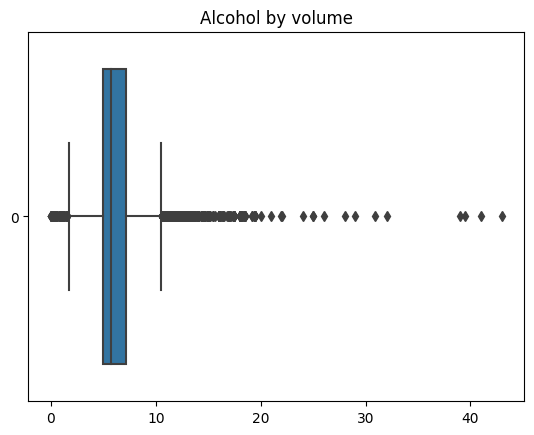

In [34]:
data = df['beer_abv']
titulo = 'Alcohol by volume'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

### Creación de nuevas características

In [19]:
df['puntuacion_promedio'] = (df['review_overall'] + df['review_aroma'] + df['review_appearance'] + df['review_palate'] + df['review_taste'])/5
df['puntuacion_multiplicada'] = df['review_overall'] * df['review_aroma'] * df['review_appearance'] * df['review_palate'] * df['review_taste'] * df['beer_abv'] * df['beer_abv']
df

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,potencia_alcoholica,beer_abv_estandarizado,review_overall_estandarizado,puntuacion_promedio,puntuacion_multiplicada,natural_log_puntuacion_multiplicada
0,7377,3.250000,3.000000,3.000000,3.250000,3.250000,5.2,SUAVE,-0.525138,-0.661963,3.150000,8354.092500,7.381848
1,21753,4.150000,4.175000,4.400000,4.125000,4.125000,4.2,SUAVE,-1.014133,0.802378,4.195000,22882.514150,8.603044
2,5330,4.000000,4.000000,4.000000,4.000000,4.500000,8.0,COMPLEJA,0.844047,0.558321,4.100000,73728.000000,9.128696
3,67188,4.125000,3.875000,3.750000,4.125000,4.000000,6.0,COMPLEJA,-0.133943,0.761702,3.975000,35605.195312,8.688487
4,16542,4.208333,3.750000,4.333333,4.083333,4.083333,6.7,COMPLEJA,0.208354,0.897289,4.091667,51185.007440,8.941094
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39195,44681,3.750000,3.250000,3.750000,4.000000,3.500000,5.1,SUAVE,-0.574038,0.151560,3.650000,16642.335938,8.090465
39196,41195,3.571823,3.350829,3.486188,3.389503,3.370166,5.0,SUAVE,-0.622937,-0.138342,3.433702,11915.718371,7.776176
39197,16000,3.625000,3.687500,3.812500,3.812500,3.875000,5.0,SUAVE,-0.622937,-0.051821,3.762500,18822.246647,8.233357
39198,11281,3.907407,3.444444,3.462963,3.555556,3.777778,4.0,SUAVE,-1.111932,0.407669,3.629630,10016.582808,7.825703


### Transformación de variables

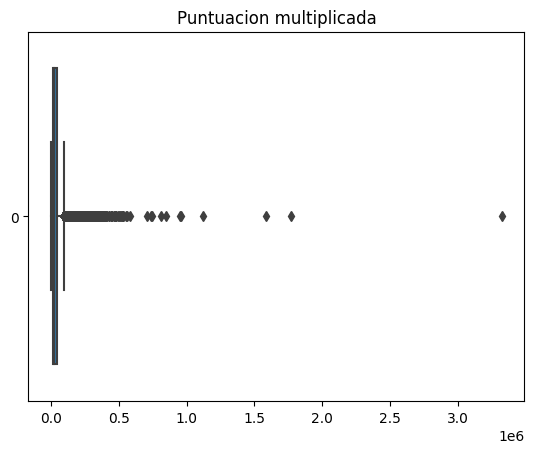

In [20]:
data = df['puntuacion_multiplicada']
titulo = 'Puntuacion multiplicada'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

In [21]:
df['natural_log_puntuacion_multiplicada'] = np.log(df['puntuacion_multiplicada'])
df

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,potencia_alcoholica,beer_abv_estandarizado,review_overall_estandarizado,puntuacion_promedio,puntuacion_multiplicada,natural_log_puntuacion_multiplicada
0,7377,3.250000,3.000000,3.000000,3.250000,3.250000,5.2,SUAVE,-0.525138,-0.661963,3.150000,8354.092500,9.030507
1,21753,4.150000,4.175000,4.400000,4.125000,4.125000,4.2,SUAVE,-1.014133,0.802378,4.195000,22882.514150,10.038128
2,5330,4.000000,4.000000,4.000000,4.000000,4.500000,8.0,COMPLEJA,0.844047,0.558321,4.100000,73728.000000,11.208138
3,67188,4.125000,3.875000,3.750000,4.125000,4.000000,6.0,COMPLEJA,-0.133943,0.761702,3.975000,35605.195312,10.480247
4,16542,4.208333,3.750000,4.333333,4.083333,4.083333,6.7,COMPLEJA,0.208354,0.897289,4.091667,51185.007440,10.843202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39195,44681,3.750000,3.250000,3.750000,4.000000,3.500000,5.1,SUAVE,-0.574038,0.151560,3.650000,16642.335938,9.719705
39196,41195,3.571823,3.350829,3.486188,3.389503,3.370166,5.0,SUAVE,-0.622937,-0.138342,3.433702,11915.718371,9.385614
39197,16000,3.625000,3.687500,3.812500,3.812500,3.875000,5.0,SUAVE,-0.622937,-0.051821,3.762500,18822.246647,9.842795
39198,11281,3.907407,3.444444,3.462963,3.555556,3.777778,4.0,SUAVE,-1.111932,0.407669,3.629630,10016.582808,9.211997


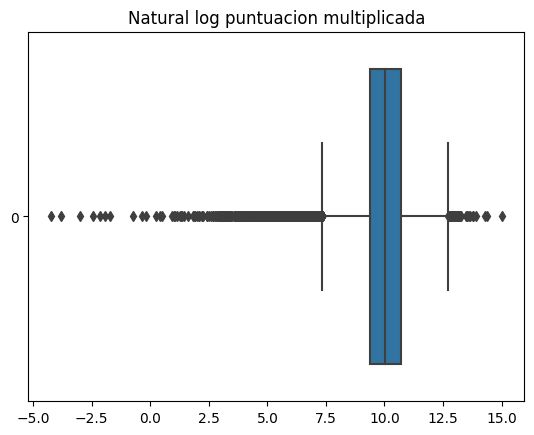

In [22]:
data = df['natural_log_puntuacion_multiplicada']
titulo = 'Natural log puntuacion multiplicada'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()